# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# Arboles de Decision

## Ejercicio Dataset Flor Iris

### Importar Librerias

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt                         #libreria para generar graficos

### Importando Dataset

In [ ]:
db_iris = load_iris() # este datasets ya es propio de SKlearn, por eso no lo traemos de Github o de Google Chrom

### Informacion del Dataset

In [ ]:
#imprimiento la descripcion del dataset
print(db_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#imprimiento datos del target
print(db_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Conversion del DataSet a un DataFrame

In [ ]:
# esta conversion se hace para poder trabajar mas facilmente con los datos. Esto nos generara una tabla tipo Excel
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names) #df_iris es un Data frae compuesto por filas de la data del Dataset db_iris y de columnas tiene los featurenames del mismo dataset
df_iris['target'] = db_iris.target #crea una ultima columna llamada target, en la cual se almacenara la info target del dataset original
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### Dividiendo el DataFrame en Test y Train

In [ ]:
#dividiremos el dataset en  75% (train) y 25% (test), estos valores estan por defecto
X_train, X_test, Y_train, Y_test = train_test_split( df_iris[db_iris.feature_names], df_iris['target'], random_state=0 ) 

### Creacion del Arbol de decision

In [ ]:
# vamos a usar un árbol de profundidad 2 (maximo dos niveles), 
#si no se define esta valor el arbol puede crecer hasta que el algoritmo encuentre una minima ramificación
#cual es la profundidad ideal?
arbol_clasi = DecisionTreeClassifier(max_depth = 2, random_state = 0)

### Entrenamiento del Algoritmo

In [ ]:
arbol_clasi.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Prediccion de datos

In [ ]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
arbol_clasi.predict(X_test.iloc[0].values.reshape(1, -1))

#Predicciones para varios (10) registros
arbol_clasi.predict(X_test[0:10])

sepal length (cm)    5.8
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     2.4
Name: 114, dtype: float64
2


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

### Accuary/Precision del metodo Utilizado

In [ ]:
accuary = arbol_clasi.score(X_test, Y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 89.47368421052632 %


### Graficando Arbol

In [ ]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')


True

1. condición: si es un nodo donde se toma alguna decisión
2. gini: es una medida de impureza (entropía ).
3. samples: número de muestras que satisfacen las condiciones necesarias para llegar a este nodo
4. value: cuántas muestras de cada clase llegan a este nodo
5. class: qué clase se le asigna a las muestras que llegan a este nodo

In [ ]:
"""
import cv2
import cv2 as cv

img = cv2.imread('tree_iris.png')
#Colab no permite mostrar en ventana emergente de cv2
cv2.imshow('Arbol de decisiones',img)
"""

"\nimport cv2\nimport cv2 as cv\n\nimg = cv2.imread('tree_iris.png')\n#Colab no permite mostrar en ventana emergente de cv2\ncv2.imshow('Arbol de decisiones',img)\n"

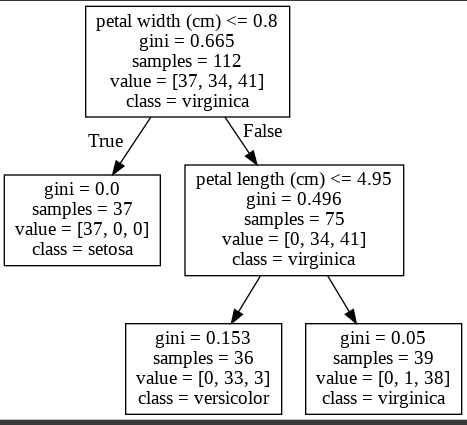

### Caracteristicas mas importantes

In [ ]:
#creamos un dataframe de panda (mejora la visualización/administración de los datos)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
3,petal width (cm),0.556
2,petal length (cm),0.444
0,sepal length (cm),0.000
1,sepal width (cm),0.000


## Ejercicio Dataset Flor Iris Mejorado

**Hiper-parametros que ayudan a mejorar la creación de un árbol**

1. max_depth: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
2. min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
3. min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
4. max_leaf_nodes: número máximo de nodos finales

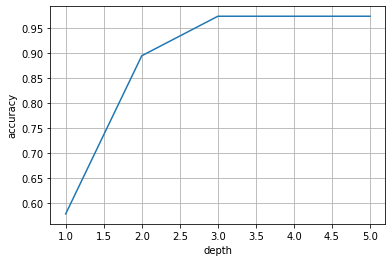

In [ ]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, Y_train)
    score = arbol_clasi.score(X_test, Y_test)
    accuracy.append(score)

# Graficamos los resultados 

plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()


De esta manera podemos ver que la version mas optima para la generacion del arbol de decision es de una profundidad de 3

#### Aplicando la profundidad maxima

In [ ]:
db_iris = load_iris()

df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names) 
df_iris['target'] = db_iris.target

X_train, X_test, Y_train, Y_test = train_test_split( df_iris[db_iris.feature_names], df_iris['target'], random_state=0 ) 

arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 0)

arbol_clasi.fit(X_train, Y_train)

accuary = arbol_clasi.score(X_test, Y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 97.36842105263158 %


In [ ]:
class_names_list=list(['setosa','versicolor','virginica'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

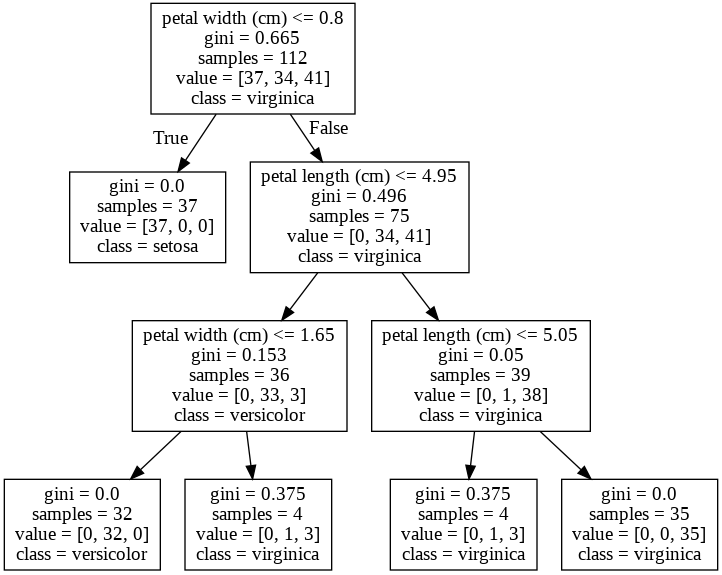

## Ejercicio DataFrame Mercadeo Bancario

El conjunto de datos fue tomado del repositorio UCI Machine Learning, con algunos cambios realizados en el repositorio de Machine Learning, Luis Castellanos, y esta relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente se subscribirá(1/0) a un depósito a plazo (variable y)

Las variables del dataset son las siguientes:

1. edad (numérica)
2. trabajo: tipo de trabajo (categórico: "admin.”, "housemaid", "management", "retired", "self-employed", "student", "technician", "unemployed", "unknown")
3. conyugal: estado civil (categórico: "divorciado", "casado", "único", "desconocido")
4. educación: (categórica: “preschool", “primary_school", “tecnical_school", " Technological_school", "illiterate", "professional.course", "university.degree", "unknown")
5. Total_hijos: número total de hijos
6. credito_sin_pago: ¿tiene crédito en incumplimiento de pago? (categóricamente: "no", "sí", "desconocido")
prestamo_vivienda: ¿tiene préstamo de vivienda? (categóricamente: "no", "sí", "desconocido")
7. prestamo_personal: ¿tiene préstamo personal? (categóricamente: "no", "sí", "desconocido")
8. valor_préstamo:(numérico) es el valor total del prestamos que tiene con el banco
9. tarjetas_credito: Número de tarjetas de crédito con otros bancos
10. contacto: tipo de comunicación de contacto (categórico: "celular", "teléfono")
11. mes: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
12. dia_semana: último día de contacto de la semana (categórico: "mon", "tue", "wed", "thu", "fri")
13. duracion_ultimo_contacto: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al destino de salida (p. ej., si duration-0 y 'no').
14. campanna: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
15. dias_ultimo_contacto: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
16. anterior_contacto: número de contactos realizados antes de esta campaña y para este cliente (numérico)
17. resultado_anterior: resultado de la campaña de marketing anterior (categórica: "fracaso", "inexistente", "éxito")
18. numero_empleados: número de empleados que tiene a su cargo — (numérico)
Predecir variable (objetivo deseado): (binario: "1", significa "Sí", "0" significa "No")

La base de datos es la siguiente:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/mercadeo_bancario_original.csv

o 

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/mercadeo_bancario_original.csv

### Importar Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt                         #libreria para generar graficos

from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE


### Importar DataFrame Github

In [2]:
data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/mercadeo_bancario_original.csv", encoding='utf-8')


### Tipos de datos del Dataframe

In [3]:
data.dtypes

edad                         int64
trabajo                     object
estado_civil                object
educacion                   object
total_hijos                  int64
credito_sin_pago            object
prestamo_vivienda           object
prestamo_personal           object
valor_prestamo               int64
dias_ultimo_pago             int64
tarjetas_credito             int64
contacto                    object
mes                         object
dia_semana                  object
duracion_ultimo_contacto     int64
dias_ultimo_contacto         int64
anterior_contacto            int64
numero_empleados             int64
si_no                        int64
dtype: object

In [4]:
le =preprocessing.LabelEncoder() 

In [5]:
mes = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
data['mes'] = data['mes'].map(mes)
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)
data['trabajo'] = le.fit_transform(data['trabajo'])
data['estado_civil '] = le.fit_transform(data['estado_civil '])
data['educacion'] = le.fit_transform(data['educacion'])
data['credito_sin_pago'] = le.fit_transform(data['credito_sin_pago'])
data['prestamo_vivienda'] = le.fit_transform(data['prestamo_vivienda'])
data['prestamo_personal'] = le.fit_transform(data['prestamo_personal'])
data['contacto'] = le.fit_transform(data['contacto'])


In [6]:
data.dtypes

edad                        int64
trabajo                     int64
estado_civil                int64
educacion                   int64
total_hijos                 int64
credito_sin_pago            int64
prestamo_vivienda           int64
prestamo_personal           int64
valor_prestamo              int64
dias_ultimo_pago            int64
tarjetas_credito            int64
contacto                    int64
mes                         int64
dia_semana                  int64
duracion_ultimo_contacto    int64
dias_ultimo_contacto        int64
anterior_contacto           int64
numero_empleados            int64
si_no                       int64
dtype: object

In [9]:
X = data.drop('si_no', axis=1)
y = data.si_no

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0 ) 

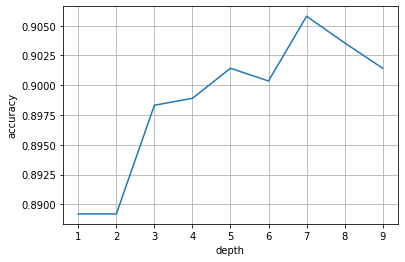

In [15]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 10))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, y_train)
    score = arbol_clasi.score(X_test, y_test)
    accuracy.append(score)

# Graficamos los resultados 

plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()


Funciona antes de decaer en una "depth" de 

In [25]:
arbol_clasi = DecisionTreeClassifier(max_depth = 7, random_state = 0)

arbol_clasi.fit(X_train, y_train)

accuary = arbol_clasi.score(X_test, y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 90.57978051859766 %


### Arbol

In [36]:
X.keys()

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'],
      dtype='object')

In [40]:
class_names_list=list(['edad','trabajo','estado_civil ','educacion','total_hijos',
                       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
                       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
                       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
                       'anterior_contacto', 'numero_empleados'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

names = []
for i in range(len(X.keys())):
  print(X.keys()[i])
  names.append(X.keys()[i])

print(names)

dot_data = export_graphviz(arbol_clasi,feature_names=names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('mercado_bancario.png')

edad
trabajo
estado_civil 
educacion
total_hijos
credito_sin_pago
prestamo_vivienda
prestamo_personal
valor_prestamo
dias_ultimo_pago
tarjetas_credito
contacto
mes
dia_semana
duracion_ultimo_contacto
dias_ultimo_contacto
anterior_contacto
numero_empleados
['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos', 'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal', 'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto', 'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto', 'anterior_contacto', 'numero_empleados']


True

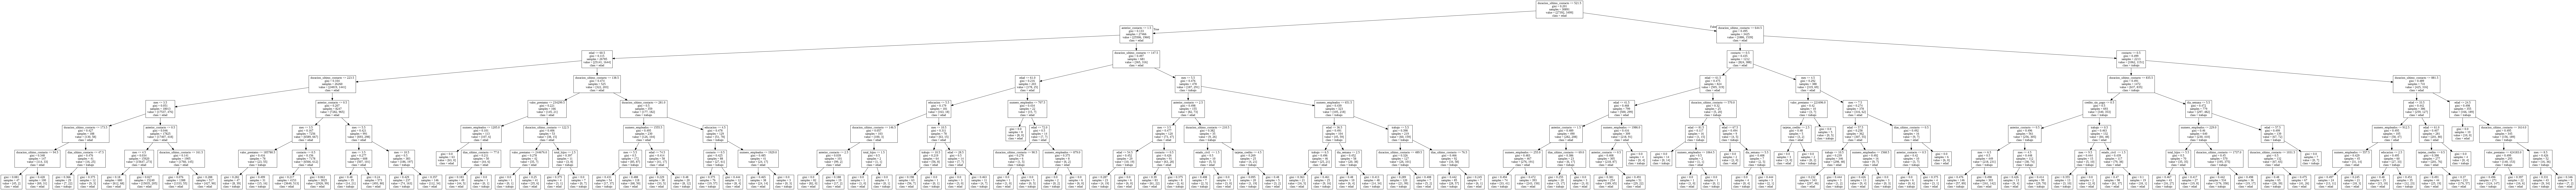